In [134]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.linear_model import LinearRegression
import tkinter as tk
import json
import requests
from ast import literal_eval
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import xgboost as xgb



In [135]:
path = kagglehub.dataset_download('tmdb/tmdb-movie-metadata')
print("path = ", path)


path =  C:\Users\seanl\.cache\kagglehub\datasets\tmdb\tmdb-movie-metadata\versions\2


In [136]:
df1 = pd.read_csv(str(path + '/tmdb_5000_credits.csv'))
df2 = pd.read_csv(str(path + '/tmdb_5000_movies.csv'))

In [137]:
# df2.head(3)

In [138]:
df1.columns = ['id','title_1','cast','crew']
df2 = df2.merge(df1, on ='id')

In [139]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title_1,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [140]:
c = df2['vote_average'].mean()
print(c)

m = df2['vote_count'].quantile(0.9)
print(m)


6.092171559442016
1838.4000000000015


In [141]:
q_movie = df2.copy().loc[df2['vote_count'] >= m]
q_movie.shape

(481, 23)

In [142]:
def weithted_rating(x, m=m, c=c):
    v = [x['vote_count']]
    R = [x['vote_average']]
    return (v/(v+m) * R) + (m/(m+v) * c)

q_movie['score'] = q_movie.apply(weithted_rating, axis=1)

In [143]:
q_movie['score'].head()

0     [7.050669301008783]
1     [6.665696105464818]
2      [6.23939600832406]
3     [7.346720532407277]
4    [6.0963679070457815]
Name: score, dtype: object

In [144]:
q_movie = q_movie.sort_values('popularity', ascending=False)
q_movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,title_1,cast,crew,score
546,74000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,211672,"[{""id"": 3487, ""name"": ""assistant""}, {""id"": 179...",en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,Minions,"[{""cast_id"": 22, ""character"": ""Scarlet Overkil...","[{""credit_id"": ""5431b2b10e0a2656e20026c7"", ""de...",[6.311705962317565]
95,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,157336,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,Interstellar,"[{""cast_id"": 9, ""character"": ""Joseph Cooper"", ...","[{""credit_id"": ""52fe4bbf9251416c910e4801"", ""de...",[7.809478504799392]
788,58000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,293660,"[{""id"": 2095, ""name"": ""anti hero""}, {""id"": 307...",en,Deadpool,Deadpool tells the origin story of former Spec...,514.569956,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,Deadpool,"[{""cast_id"": 99, ""character"": ""Wade Wilson / D...","[{""credit_id"": ""56c986b2925141172f0068b6"", ""de...",[7.212652001408683]
94,170000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,118340,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",481.098624,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,Guardians of the Galaxy,"[{""cast_id"": 1, ""character"": ""Peter Quill / St...","[{""credit_id"": ""538ce329c3a3687155003358"", ""de...",[7.613005439784308]
127,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,76341,"[{""id"": 2964, ""name"": ""future""}, {""id"": 3713, ...",en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,434.278564,"[{""name"": ""Village Roadshow Pictures"", ""id"": 7...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,Mad Max: Fury Road,"[{""cast_id"": 2, ""character"": ""Max Rockatansky""...","[{""credit_id"": ""577da370c3a36817f8003838"", ""de...",[7.019213538345571]


Text(0.5, 1.0, 'Popular Movies')

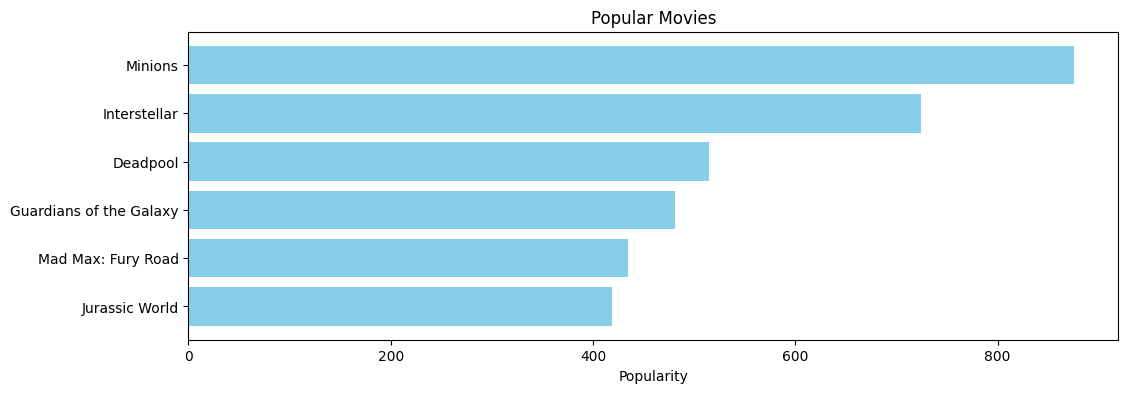

In [145]:
pop= df2.sort_values('popularity', ascending=False)
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [146]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [147]:
#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [148]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [149]:
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [150]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [151]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [152]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [153]:
# # api_key, access_token -> https://www.themoviedb.org/settings/api

# api_key = "your_api_key"
# read_access_token = "your_read_access_token"

# with open("key.json", "r") as f:
#     keys = json.load(f)


# api_key = keys["api_key"]
# read_access_token = keys["read_access_token"]

# root = tk.Tk()
# root.title("TMDB Movie Revenue")
# root.geometry("350x500")

# label_movie_id = tk.Label(root, text="movie_ID")
# label_movie_id.pack(pady=(10,5))
# entry_movie_id = tk.Entry(root, width=25)
# entry_movie_id.pack()

# def print_movie():
#     movie_id = entry_movie_id.get()
#     print('-' * 60)
#     print('[PRINT] Movie ID = ', movie_id)
#     print('-' * 60)
    
# button_print = tk.Button(root, text='Print', command=print_movie)
# button_print.pack(pady=15)

# def print_recommendations():
#     movie_id = entry_movie_id.get() 
#     url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'
#     response = requests.get(url)
#     data = response.json()
#     title_name = data.get('title')
#     print('[Result] Title Name = ', title_name)
#     print('-' * 60)


# button_revenue = tk.Button(root, text='Recommendations', command=print_recommendations)
# button_revenue.pack(pady=15)

# url = "https://api.themoviedb.org/3/authentication"

# headers = {
#     "accept": "application/json",
#     "Authorization": "Bearer {read_access_token}"
# }

# response = requests.get(url, headers=headers)

# print(response.text)


# root.mainloop()

In [154]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [155]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [156]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [157]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [158]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [159]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [160]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [161]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [162]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [163]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [164]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [165]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [166]:
df2.shape, df2.columns

((4803, 26),
 Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
        'original_language', 'original_title', 'overview', 'popularity',
        'production_companies', 'production_countries', 'release_date',
        'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
        'vote_average', 'vote_count', 'title_1', 'cast', 'crew', 'director',
        'soup'],
       dtype='object'))

In [167]:
df2.head(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,title_1,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[samworthington, zoesaldana, sigourneyweaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[danielcraig, christophwaltz, léaseydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",sammendes,spy basedonnovel secretagent danielcraig chris...
3,3,250000000,"[action, crime, drama]",http://www.thedarkknightrises.com/,49026,"[dccomics, crimefighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",christophernolan,dccomics crimefighter terrorist christianbale ...
4,4,260000000,"[action, adventure, sciencefiction]",http://movies.disney.com/john-carter,49529,"[basedonnovel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[taylorkitsch, lynncollins, samanthamorton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",andrewstanton,basedonnovel mars medallion taylorkitsch lynnc...


In [168]:
df2.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [169]:
df2.describe(include='all')

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,title_1,cast,crew,director,soup
count,4803.000000,4.803000e+03,4803,1712,4803.000000,4803,4803,4803,4803,4803.000000,...,4803,3959,4803,4803.000000,4803.000000,4803,4803,4803,4803,4803
unique,NaN,NaN,746,1691,NaN,4198,37,4801,4801,NaN,...,3,3944,4800,NaN,NaN,4800,4697,4776,2350,4788
top,NaN,NaN,[drama],http://www.thehungergames.movie/,NaN,[],en,Batman,,NaN,...,Released,Based on a true story.,The Host,NaN,NaN,The Host,[],[],,
freq,NaN,NaN,370,4,NaN,412,4505,2,3,NaN,...,4795,3,2,NaN,NaN,2,43,28,30,13
mean,2401.000000,2.904504e+07,NaN,NaN,57165.484281,NaN,NaN,NaN,NaN,21.492301,...,NaN,NaN,NaN,6.092172,690.217989,NaN,NaN,NaN,NaN,NaN
std,1386.651002,4.072239e+07,NaN,NaN,88694.614033,NaN,NaN,NaN,NaN,31.816650,...,NaN,NaN,NaN,1.194612,1234.585891,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000e+00,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1200.500000,7.900000e+05,NaN,NaN,9014.500000,NaN,NaN,NaN,NaN,4.668070,...,NaN,NaN,NaN,5.600000,54.000000,NaN,NaN,NaN,NaN,NaN
50%,2401.000000,1.500000e+07,NaN,NaN,14629.000000,NaN,NaN,NaN,NaN,12.921594,...,NaN,NaN,NaN,6.200000,235.000000,NaN,NaN,NaN,NaN,NaN
75%,3601.500000,4.000000e+07,NaN,NaN,58610.500000,NaN,NaN,NaN,NaN,28.313505,...,NaN,NaN,NaN,6.800000,737.000000,NaN,NaN,NaN,NaN,NaN


In [170]:
df3 = df2.copy()

In [171]:
df3 = df3.drop(['homepage', 'title'], axis=1)

In [172]:
df3.columns, df3.shape 

(Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
        'original_title', 'overview', 'popularity', 'production_companies',
        'production_countries', 'release_date', 'revenue', 'runtime',
        'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
        'title_1', 'cast', 'crew', 'director', 'soup'],
       dtype='object'),
 (4803, 24))

In [173]:
# data cleasning 1
df3 = df3.replace([np.inf, -np.inf], np.nan)  
df3 = df3.dropna(how='any')
print(df3.shape, df3.columns, df3.isna().sum())


(3959, 24) Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'title_1', 'cast', 'crew', 'director', 'soup'],
      dtype='object') index                   0
budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
vote_average            0
vote_count              0
title_1                 0
cast                    0
crew                    0
director                0
soup             

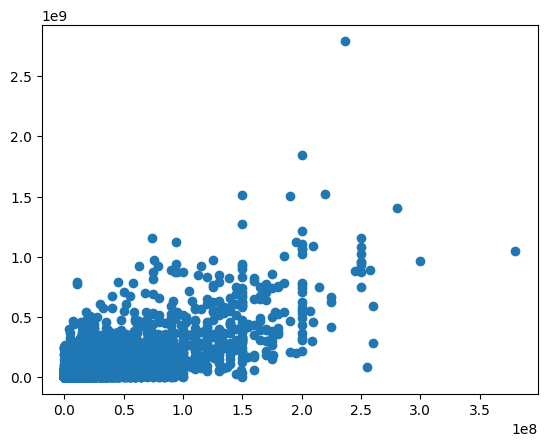

In [174]:
plt.scatter(df3['budget'], df3['revenue'])

In [175]:
X = df3['budget'].values.reshape(-1, 1)
y = df3['revenue']
regressor = LinearRegression().fit(X, y)

In [176]:
y_pred = regressor.predict(X) 

In [177]:
y.head(5)

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

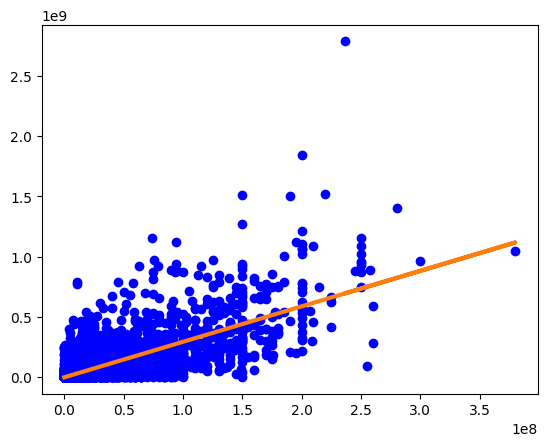

In [178]:
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, linewidth=3, color='tab:orange', label='Regression Module Prediction')

In [179]:
X_xgb = df3[['budget', 'popularity', 'vote_average', 'vote_count']]
xgbrModule = xgb.XGBRegressor()
xgbrModule.fit(X_xgb, y)
y_xgbpred = xgbrModule.predict(X_xgb)
print("y_xgbpred is ", y_xgbpred.shape)

y_xgbpred is  (3959,)


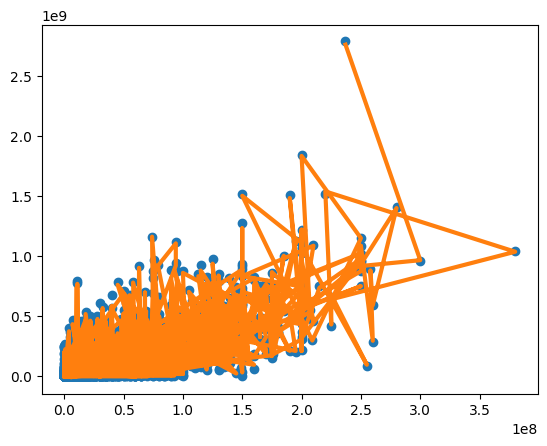

In [180]:
plt.scatter(X, y, label='Original Data Paint')
plt.plot(X, y_xgbpred, linewidth=3, color='tab:orange', label='XGBoost Regressor Prediction')